# Analysis of the Relationship Between Weather Conditions and Traffic Offense Frequencies

## Contents
1. Introduction: A brief overview of the project.
2. Datasets: A brief overview of the datasets.
3. Import Packages: Import the necessary packages.
4. Data Loading: Load the data into a notebook.
5. Data Inspection: Explore the dataset for basic understanding.
6. Data Visualization: Create visualizations to explore the data and gain insights.
7. Correlation Analysis: Analyze the correlation between data.
8. Interpretation of Results: Summarize the key findings and insights obtained from the data exploration.
9. Limitations: Limitiation of the analysis and data.
10. Future work: Analyze the scope of future work.

# Introduction
Traffic offenses are a significant concern for public safety and urban planning. Understanding the factors influencing traffic violations is crucial for developing effective strategies to reduce them. This report investigates the potential relationship between various weather conditions and the frequency of traffic offenses. The motivation behind this study is to explore whether specific weather parameters can be indicators or contributors to changes in the number of traffic offenses, thereby aiding in better traffic management and safety measures.

### Datasets
Following datasets are used in this project:
1. Speed limit violation: This dataset contains information on fines for speeding in the Bonn City area in 2022. It includes the date, time, place, fines, and offense number.
    * Datasource name: Bußgelder fließender Verkehr 2022
    * Metadata URL: https://mobilithek.info/offers/-5415240082314561823
    * Data URL: https://opendata.bonn.de/sites/default/files/Geschwindigkeitsverstoesse2022.csv
    * Data Type: CSV
2. Weather dataset: This dataset is generated from the POWER project of NASA (Nasa power api).
    * Datasource2: NASA Prediction Of Worldwide Energy Resources
    * Metadata URL: https://power.larc.nasa.gov/data-access-viewer
    * Data URL: https://power.larc.nasa.gov/data-access-viewer
    * Data Type: CSV
    
    This weather dataset is generated from the POWER project using the following options:
    * Date: Jan 01, 2022 to Dec 31, 2022
    * Temporal: Daily
    * Location: Bonn
    * Parameter(s): 
        * T2M             MERRA-2 Temperature at 2 Meters (C) 
        * T2MDEW          MERRA-2 Dew/Frost Point at 2 Meters (C) 
        * QV2M            MERRA-2 Specific Humidity at 2 Meters (g/kg) 
        * PRECTOTCORR     MERRA-2 Precipitation Corrected (mm/day) 
        * PS              MERRA-2 Surface Pressure (kPa) 
        * WS10M           MERRA-2 Wind Speed at 10 Meters (m/s) 
        * WD10M           MERRA-2 Wind Direction at 10 Meters (Degrees) 

# Methods

### Import Packages
Import the necessary packages that will be used in the exploration.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import calendar

### Data Loading
Load the SQLite data file into the notebook using pandas. data is already cleaned and merged during the creation of the SQLite database.

In [55]:
df = pd.read_sql_table('weather_traffic_fines', 'sqlite:///data/data.sqlite')

### Data Inspection
Explore the dataset by examining its structure, dimensions, and basic properties to get an initial understanding of the data.

In [56]:
df.head(10)

,DATE,T2M,T2MDEW,QV2M,PRECTOTCORR,PS,WS10M,WD10M,TRAFFIC OFFENCE FREQUENCIES
0,2022-01-01,8.74,8.08,6.90,0.11,97.96,5.12,218.75,199
1,2022-01-02,7.61,6.01,6.04,1.96,97.11,7.83,227.38,162
2,2022-01-03,7.15,6.08,6.04,5.73,96.67,7.70,241.56,297
3,2022-01-04,4.27,3.70,5.25,15.48,95.43,3.80,256.81,255
4,2022-01-05,0.80,0.01,3.97,2.29,96.24,7.89,281.19,401
5,2022-01-06,0.20,-0.36,3.85,0.32,97.32,4.28,263.19,357
6,2022-01-07,0.37,-0.52,3.78,6.90,96.75,6.46,215.94,402
7,2022-01-08,0.45,-0.26,3.91,4.39,96.06,7.25,228.94,198
8,2022-01-09,0.87,0.36,4.09,5.28,95.61,6.73,266.06,192
9,2022-01-10,-0.57,-2.20,3.30,0.05,97.64,1.43,207.75,449


In [57]:
df.tail(10)

,DATE,T2M,T2MDEW,QV2M,PRECTOTCORR,PS,WS10M,WD10M,TRAFFIC OFFENCE FREQUENCIES
355,2022-12-22,7.00,6.61,6.35,12.76,96.12,6.03,230.62,577
356,2022-12-23,7.77,7.26,6.65,12.91,96.09,7.05,243.88,425
357,2022-12-24,7.26,6.59,6.29,1.27,96.93,5.62,240.88,430
358,2022-12-25,7.08,6.67,6.35,3.50,96.89,5.95,196.94,441
359,2022-12-26,6.27,5.44,5.86,3.68,97.16,6.94,250.56,445
360,2022-12-27,2.57,1.93,4.46,0.21,97.96,6.59,224.94,443
361,2022-12-28,5.58,4.76,5.55,2.14,96.82,9.41,210.94,431
362,2022-12-29,6.99,5.48,5.86,1.76,96.29,9.45,229.25,444
363,2022-12-30,6.34,5.72,6.04,3.79,96.43,8.83,202.94,391
364,2022-12-31,11.63,9.82,7.87,1.11,96.67,11.03,218.12,415


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   DATE                         365 non-null    datetime64[ns]
 1   T2M                          365 non-null    float64       
 2   T2MDEW                       365 non-null    float64       
 3   QV2M                         365 non-null    float64       
 4   PRECTOTCORR                  365 non-null    float64       
 5   PS                           365 non-null    float64       
 6   WS10M                        365 non-null    float64       
 7   WD10M                        365 non-null    float64       
 8   TRAFFIC OFFENCE FREQUENCIES  365 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 25.8 KB


### Data Visualization

Create visualizations to explore the data and gain insights by using plotting libraries.

A Boxplot is created to get the visual summary of the variability of values in a dataset to show the median, upper and lower quartiles, minimum and maximum values, and any outliers in the dataset.

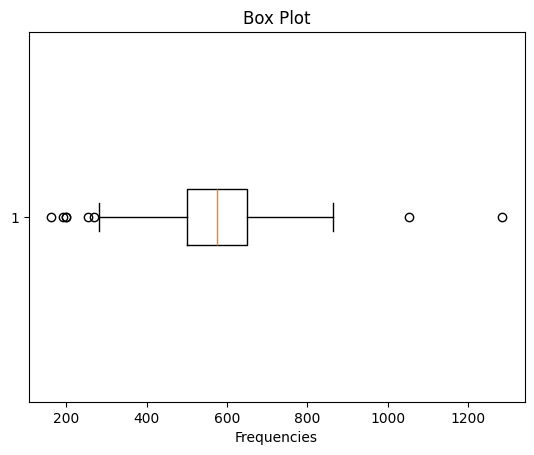

Box Plot Information: 
Minimum: 280.0
First Quartile (Q1): 500.0
Median: 574.0
Third Quartile (Q3): 651.0
Maximum: 864.0


In [59]:
# Create a box plot
box = plt.boxplot(df['TRAFFIC OFFENCE FREQUENCIES'], vert=False)

# Set labels and title
plt.xlabel('Frequencies')
plt.title('Box Plot')

# Display the plot
plt.show()

# Calculate the statistics for the box plot
statistics = {
    'min': np.min(box['whiskers'][0].get_data()[0]),
    'q1': np.percentile(box['boxes'][0].get_data()[0], 25),
    'median': np.median(box['medians'][0].get_data()[0]),
    'q3': np.percentile(box['boxes'][0].get_data()[0], 75),
    'max': np.max(box['whiskers'][1].get_data()[0])
}

# Print the information
print("Box Plot Information: ")
print(f"Minimum: {statistics['min']}")
print(f"First Quartile (Q1): {statistics['q1']}")
print(f"Median: {statistics['median']}")
print(f"Third Quartile (Q3): {statistics['q3']}")
print(f"Maximum: {statistics['max']}")

The trend of traffic fine frequencies each day over the year 2022 is observed from the following line chart.

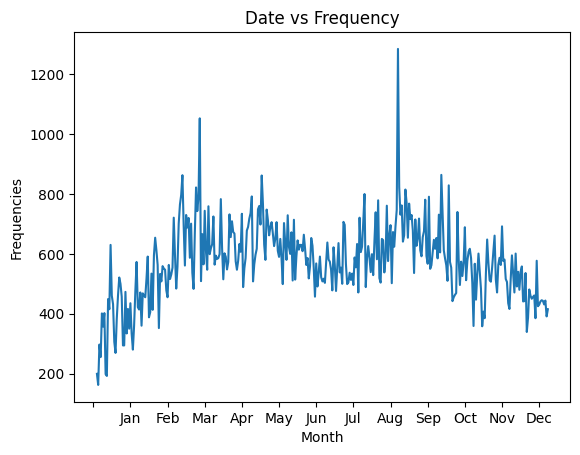

In [60]:
# Frequencies of traffic fines each day over the year.
plt.plot(df['DATE'], df['TRAFFIC OFFENCE FREQUENCIES'])
plt.xlabel('Month')
plt.ylabel('Frequencies')
plt.title('Date vs Frequency')
plt.xticks(df['DATE'], df['DATE'].dt.strftime('%b'))
max_ticks = 14
locator = ticker.MaxNLocator(max_ticks)
plt.gca().xaxis.set_major_locator(locator)
plt.show()

The count of traffic violations exhibits a rising pattern from July to September.

More insights are observed from the following bar chart.  

[11317 13918 20503 18644 20639 17987 17187 19531 20913 18428 15700 14603]


Text(0.5, 1.0, 'Date vs Frequency')

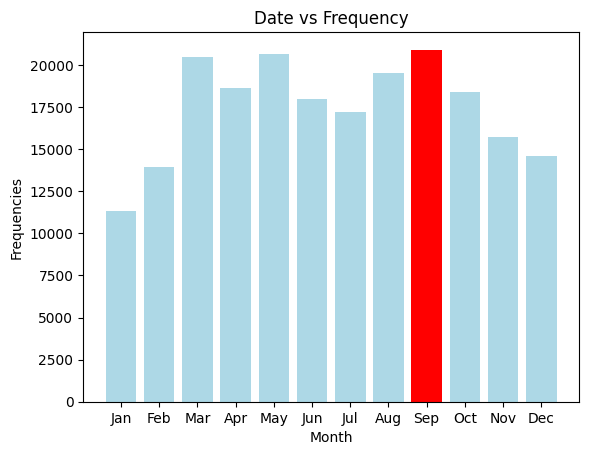

In [61]:
# Group the data by month and sum the frequencies

df_monthly = df.groupby(df['DATE'].dt.month)['TRAFFIC OFFENCE FREQUENCIES'].sum()
df_month_names = df.groupby(df['DATE'].dt.month)['DATE']
month_names = [calendar.month_name[i][:3] for i in df_monthly.index]
print(df_monthly.values)
color = ['lightblue' if (x < max(df_monthly.values)) else 'red' for x in df_monthly.values ]
plt.bar(month_names, df_monthly.values, color=color)
plt.xlabel('Month')
plt.ylabel('Frequencies')
plt.title('Date vs Frequency')

In the month of September, the highest number of instances was observed.

The bar charts presented below depict the frequency of events on a quarterly basis.

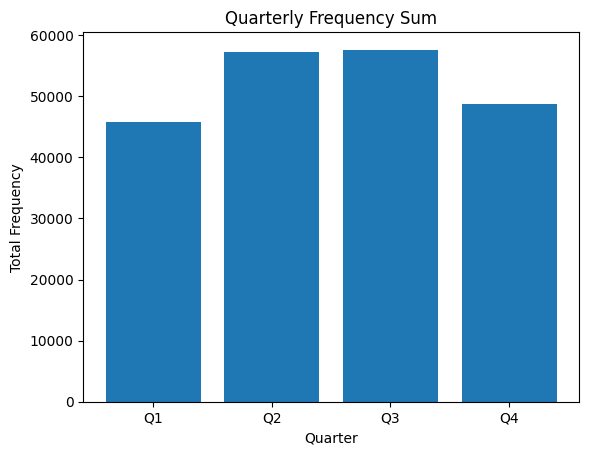

In [62]:
# Group the data by quarter and sum the frequencies
df_quarterly = df.resample('Q', on='DATE')['TRAFFIC OFFENCE FREQUENCIES'].sum()

# Get the quarter labels
quarter_labels = [f'Q{i+1}' for i in range(len(df_quarterly))]

# Plot the data as a bar chart
plt.bar(quarter_labels, df_quarterly)
plt.xlabel('Quarter')
plt.ylabel('Total Frequency')
plt.title('Quarterly Frequency Sum')

plt.show()

As anticipated based on the previous data, the third quarter stands out with the highest number of incidents.

The following chart illustrates the temperature data throughout the year. 

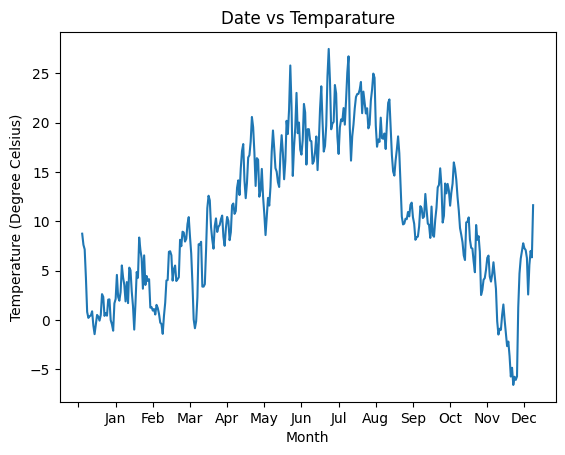

In [63]:
plt.plot(df['DATE'], df['T2M'])

plt.xticks(df['DATE'], df['DATE'].dt.strftime('%b'))
max_ticks = 14
locator = ticker.MaxNLocator(max_ticks)
plt.gca().xaxis.set_major_locator(locator)

plt.xlabel('Month')
plt.ylabel('Temperature (Degree Celsius)')
plt.title('Date vs Temparature')
plt.show()

Overall, the third quarter experiences the highest temperature.

The below chart displays the Dew/Frost point information for the entire year.


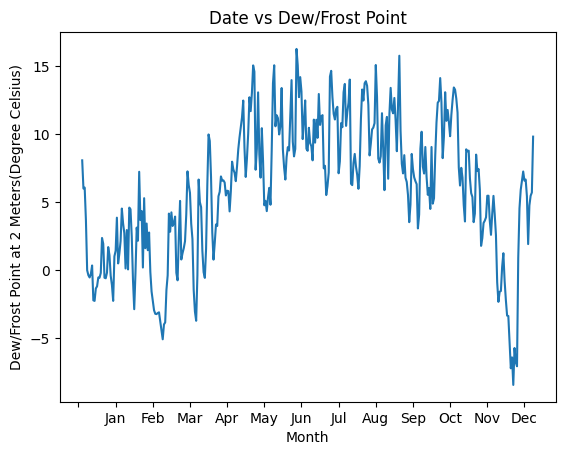

In [64]:
plt.plot(df['DATE'], df['T2MDEW'])

plt.xticks(df['DATE'], df['DATE'].dt.strftime('%b'))
max_ticks = 14
locator = ticker.MaxNLocator(max_ticks)
plt.gca().xaxis.set_major_locator(locator)

plt.xlabel('Month')
plt.ylabel('Dew/Frost Point at 2 Meters(Degree Celsius)')
plt.title('Date vs Dew/Frost Point')
plt.show()

The Dew/Frost point flactuated entire year.

The below chart displays the Specific Humidity information for the entire year.

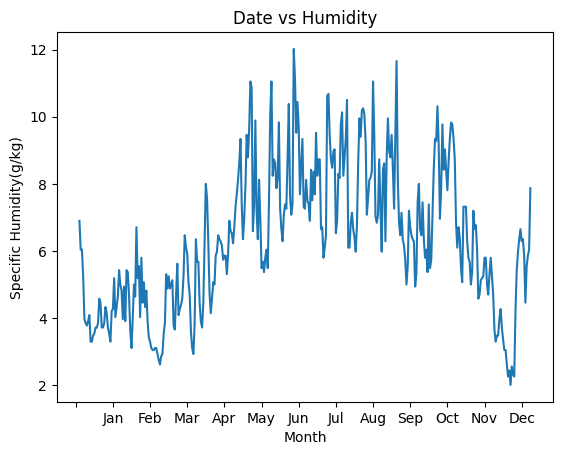

In [65]:
plt.plot(df['DATE'], df['QV2M'])

plt.xticks(df['DATE'], df['DATE'].dt.strftime('%b'))
max_ticks = 14
locator = ticker.MaxNLocator(max_ticks)
plt.gca().xaxis.set_major_locator(locator)

plt.xlabel('Month')
plt.ylabel('Specific Humidity(g/kg)')
plt.title('Date vs Humidity')
plt.show()

The Specific Humidity at 2 Meters (g/kg) was increased second and third quarter.

The below chart displays the precipitation information for the entire year.

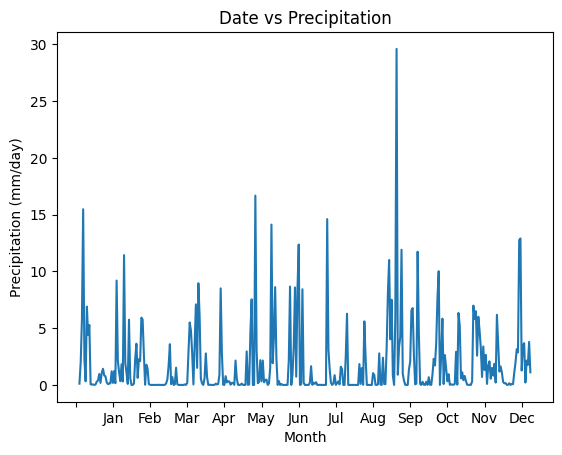

In [66]:
plt.plot(df['DATE'], df['PRECTOTCORR'])

plt.xticks(df['DATE'], df['DATE'].dt.strftime('%b'))
max_ticks = 14
locator = ticker.MaxNLocator(max_ticks)
plt.gca().xaxis.set_major_locator(locator)

plt.xlabel('Month')
plt.ylabel('Precipitation (mm/day)')
plt.title('Date vs Precipitation')
plt.show()

Regular precipitation was recorded at the beginning and end of the year. However, there was intermittent rain in the September.

The below chart provides insights into the Surface Pressure throughout the year.

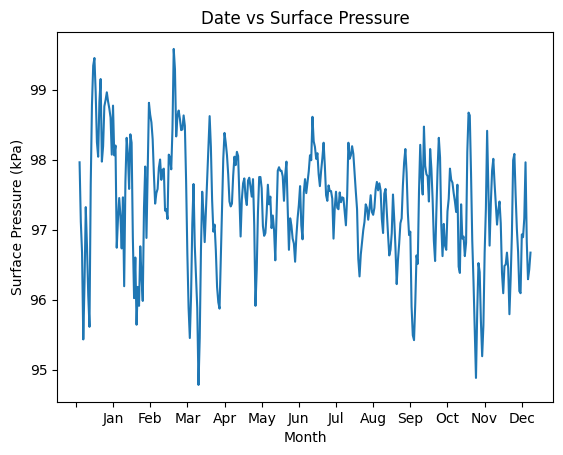

In [67]:
plt.plot(df['DATE'], df['PS'])

plt.xticks(df['DATE'], df['DATE'].dt.strftime('%b'))
max_ticks = 14
locator = ticker.MaxNLocator(max_ticks)
plt.gca().xaxis.set_major_locator(locator)

plt.xlabel('Month')
plt.ylabel('Surface Pressure (kPa)')
plt.title('Date vs Surface Pressure')
plt.show()

Surface Pressure is flactuated throughout the year but the range is very small.

The below chart provides insights into the wind speed throughout the year.

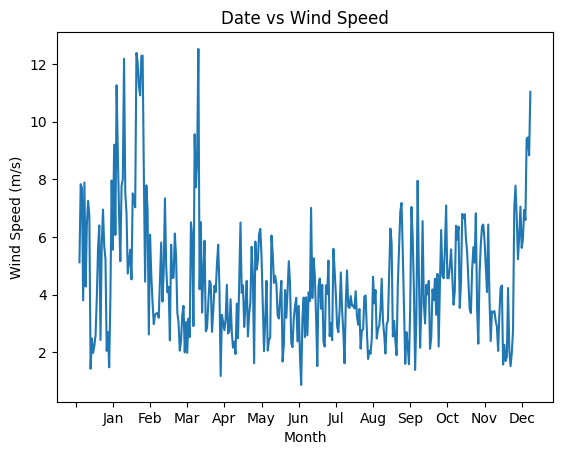

In [68]:
plt.plot(df['DATE'], df['WS10M'])
plt.xticks(df['DATE'], df['DATE'].dt.strftime('%b'))
max_ticks = 14
locator = ticker.MaxNLocator(max_ticks)
plt.gca().xaxis.set_major_locator(locator)
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')
plt.title('Date vs Wind Speed')
plt.show()

The wind speed observed during the first quarter was greater compared to the rest of the year.

The below chart provides insights into the wind direction throughout the year.

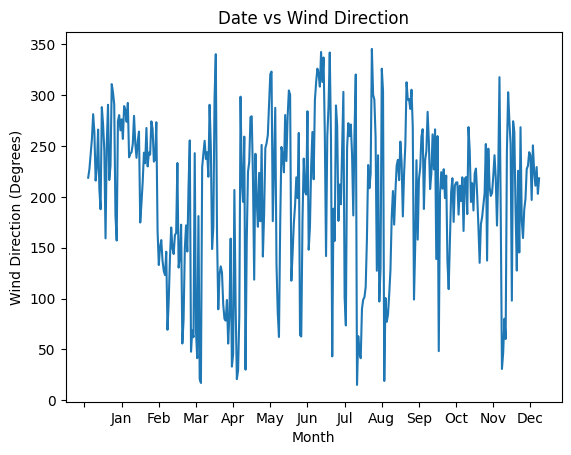

In [69]:
plt.plot(df['DATE'], df['WD10M'])
plt.xticks(df['DATE'], df['DATE'].dt.strftime('%b'))
max_ticks = 14
locator = ticker.MaxNLocator(max_ticks)
plt.gca().xaxis.set_major_locator(locator)
plt.xlabel('Month')
plt.ylabel('Wind Direction (Degrees)')
plt.title('Date vs Wind Direction')
plt.show()

Wind Direction is flactuated throughout the year.


# Results

### Correlation Analysis
To get the correlation between the frequencies of traffic fines and weather data, the following charts are created by combining the above charts.

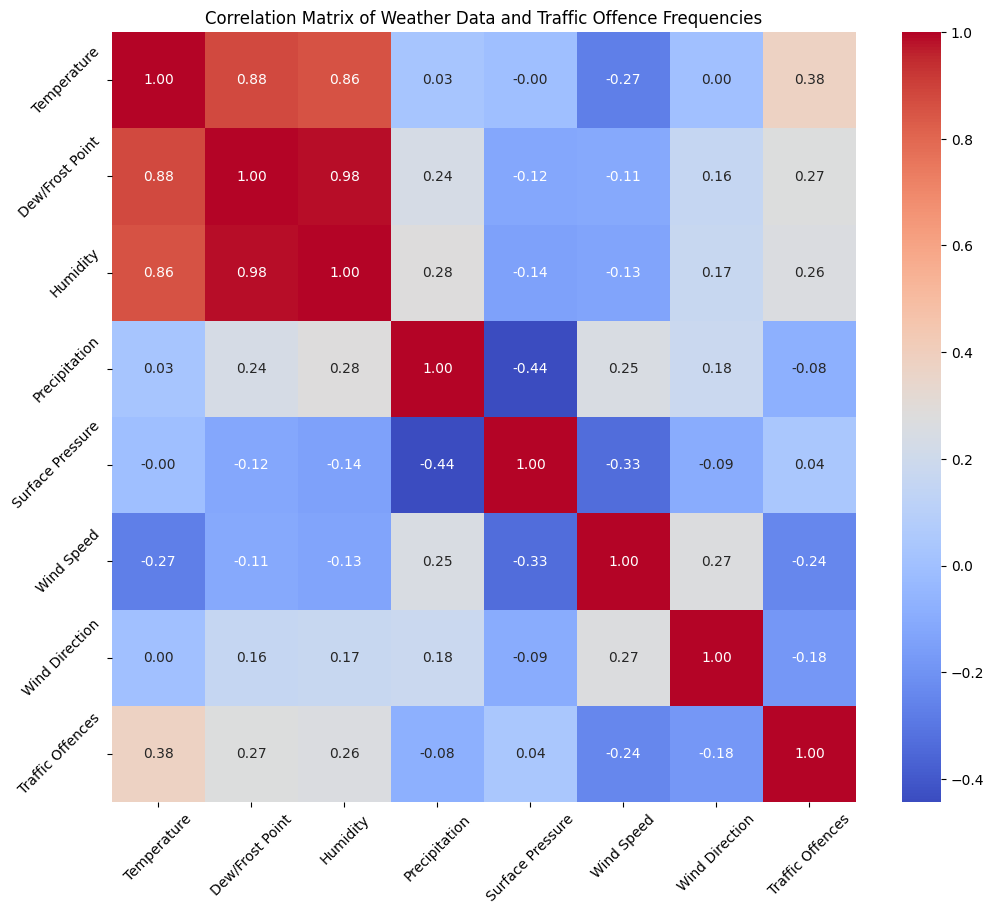

TRAFFIC OFFENCE FREQUENCIES    1.000000
T2M                            0.377582
T2MDEW                         0.274663
QV2M                           0.263121
PS                             0.036166
PRECTOTCORR                   -0.077437
WD10M                         -0.180947
WS10M                         -0.243377
Name: TRAFFIC OFFENCE FREQUENCIES, dtype: float64

In [70]:
# Calculating correlation matrix
correlation_matrix = df.corr(numeric_only = True)

# Dictionary for mapping column names to their descriptions
column_descriptions = {
    'T2M': 'Temperature',
    'T2MDEW': 'Dew/Frost Point',
    'QV2M': 'Humidity',
    'PRECTOTCORR': 'Precipitation',
    'PS': 'Surface Pressure',
    'WS10M': 'Wind Speed',
    'WD10M': 'Wind Direction',
    'TRAFFIC OFFENCE FREQUENCIES': 'Traffic Offences'
}

# Updating the column names in the correlation matrix for plotting
correlation_matrix_renamed = correlation_matrix.rename(columns=column_descriptions, index=column_descriptions)

# Plotting the correlation matrix with updated names
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_renamed, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Weather Data and Traffic Offence Frequencies")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# Displaying the correlation values specifically for 'TRAFFIC OFFENCE FREQUENCIES'
correlation_with_traffic_offences = correlation_matrix['TRAFFIC OFFENCE FREQUENCIES'].sort_values(ascending=False)
correlation_with_traffic_offences

The correlation analysis reveals the following relationships between traffic offense frequencies and the weather parameters:

1. T2M (Temperature): A moderate positive correlation (0.38). This suggests a relationship where higher temperatures are associated with more traffic offenses.

2. T2MDEW (Dew/Frost Point) and QV2M (Specific Humidity): Both show a positive correlation (0.27 and 0.26, respectively), indicating a slight tendency for traffic offenses to increase with higher humidity and dew point levels.

3. PS (Surface Pressure): A very weak positive correlation (0.04), suggesting a negligible relationship between surface pressure and traffic offenses.

4. PRECTOTCORR (Precipitation Corrected): A weak negative correlation (-0.08), indicating a slight tendency for traffic offenses to decrease with higher precipitation.

5. WD10M (Wind Direction) and WS10M (Wind Speed): Negative correlations (-0.18 and -0.24, respectively), suggesting a tendency for traffic offenses to decrease with changes in wind direction and increases in wind speed.

These correlations provide insights into the relationships between weather conditions and traffic offenses, although it's important to remember that correlation does not imply causation. Further investigation would be necessary to understand the underlying causes of these correlations. ​

### Individual Line Chart
To understand the relation between traffic offence and different weather papameters visually the line charts are created. The data are normalized and grouped by month to make the charts easy to understand.

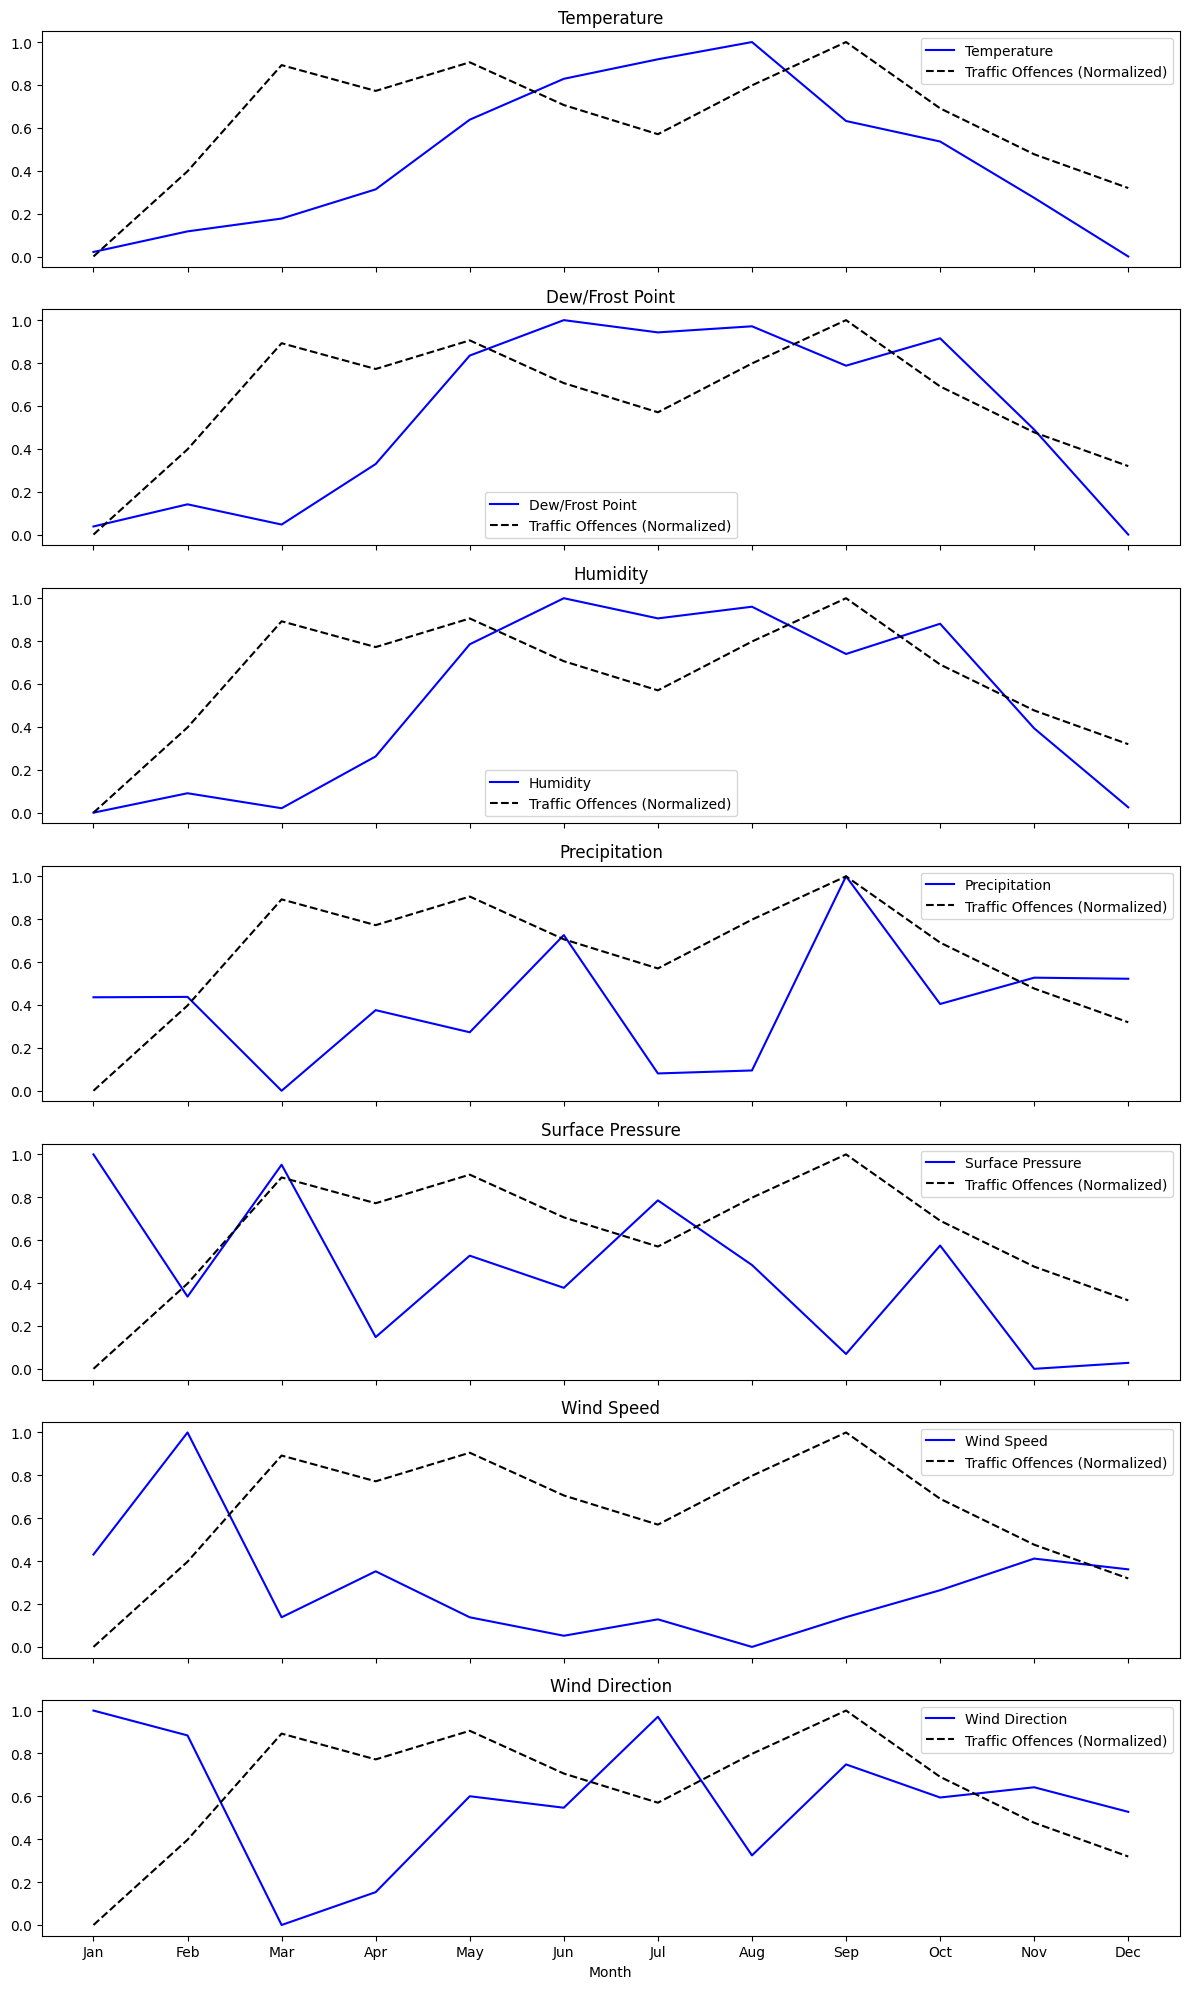

In [71]:
# Calculating monthly means for each column
monthly_means = df.groupby(df['DATE'].dt.month).mean(numeric_only = True)

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Normalizing the monthly mean data
normalized_data = pd.DataFrame(scaler.fit_transform(monthly_means), columns=monthly_means.columns, index=monthly_means.index)


# Updating the column names in the normalized monthly mean data for plotting
normalized_data_renamed = normalized_data.rename(columns=column_descriptions)

# Creating individual plots for each weather parameter compared to traffic offense frequencies with updated names
fig, axes = plt.subplots(7, 1, figsize=(12, 20), sharex=True)

# Updated list of weather parameters excluding the traffic offense frequencies
weather_parameters_renamed = [col for col in normalized_data_renamed.columns if col != 'Traffic Offences']
# Plotting each weather parameter against traffic offenses in a separate subplot
for i, param in enumerate(weather_parameters_renamed):
    axes[i].plot(normalized_data_renamed.index, normalized_data_renamed[param], label=param, color='blue')
    axes[i].plot(normalized_data_renamed.index, normalized_data_renamed['Traffic Offences'], label='Traffic Offences (Normalized)', color='black', linestyle='--')
    axes[i].set_title(param)
    axes[i].legend()

plt.xlabel('Month')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


This line charts is not explaning any new information. the relation between traffic offences and weather still unclear in the charts.

### Scatter Plots
To further illustrate these relationships, I'll create scatter plots for the variables with significant correlations (T2M, T2MDEW, QV2M, PRECTOTCORR, WS10M and WD10M) against the traffic offense frequencies. ​

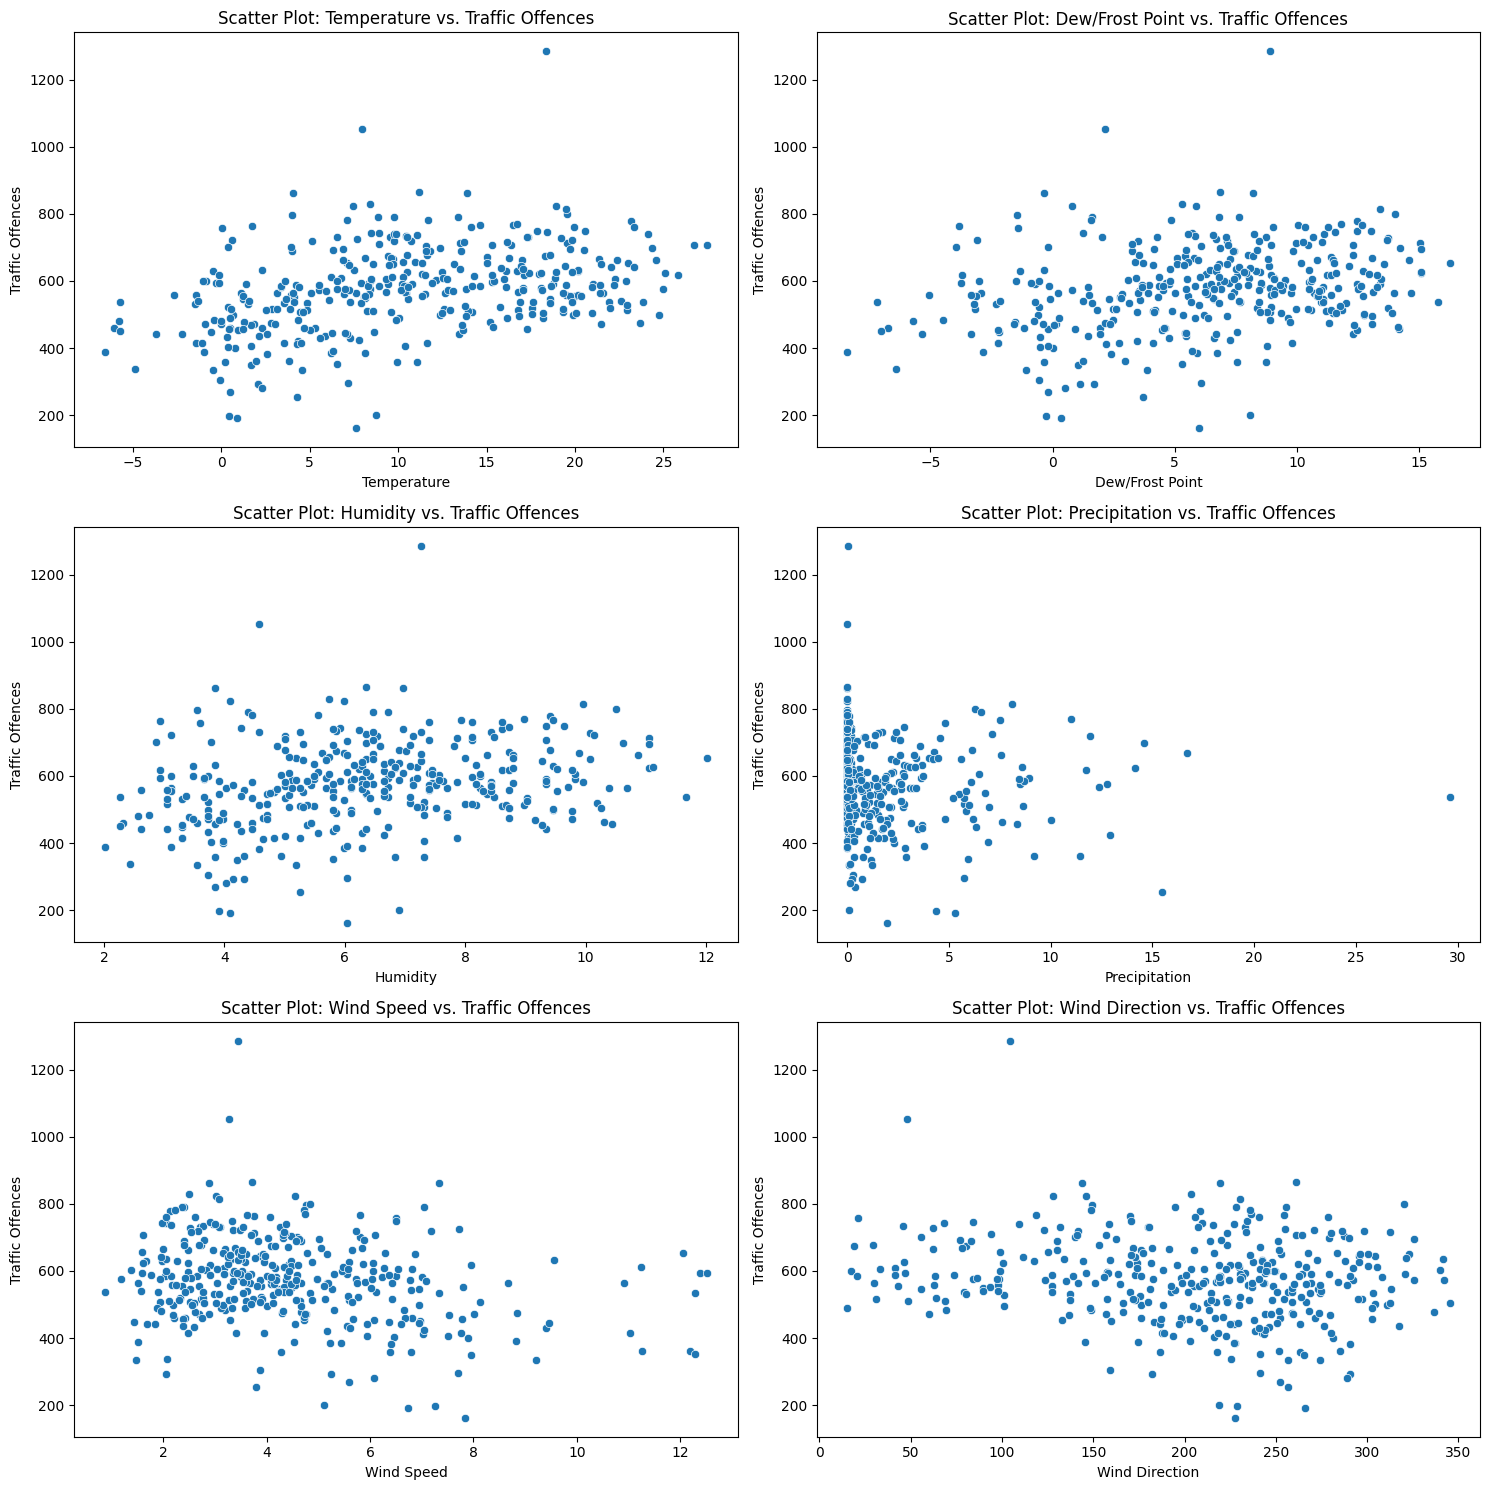

In [72]:
# Scatter plots for variables with significant correlations
significant_variables = ['T2M', 'T2MDEW', 'QV2M', 'PRECTOTCORR', 'WS10M', 'WD10M']

# Setting up the plot
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

# Creating scatter plots
for i, var in enumerate(significant_variables):
    sns.scatterplot(data=df, x=var, y='TRAFFIC OFFENCE FREQUENCIES', ax=axes[i])
    axes[i].set_title(f'Scatter Plot: {column_descriptions[var]} vs. Traffic Offences')
    axes[i].set_xlabel(column_descriptions[var])
    axes[i].set_ylabel('Traffic Offences')

plt.tight_layout()
plt.show()


The scatter plots illustrate the relationships between traffic offense frequencies and various weather parameters:

1. Temperature at 2 Meters (T2M): Shows a pattern where higher temperatures might be associated with more traffic offenses.

2.  Dew/Frost Point at 2 Meters (T2MDEW) and Specific Humidity at 2 Meters (QV2M): Indicate a possible trend where higher humidity and dew point levels correspond with increased traffic offenses.

3. Corrected Precipitation (PRECTOTCORR): Displays a distribution that suggests a weak inverse relationship, with more precipitation possibly leading to fewer traffic offenses.

4. Wind Direction at 10 Meters (WD10M) and Wind Speed at 10 Meters (WS10M): Show trends where certain wind directions and higher wind speeds might be associated with fewer traffic offenses.



These visualizations reinforce the correlation findings, but it's important to interpret them cautiously. Correlation does not necessarily mean causation, and other external factors not captured in this data might also play a role in traffic offense frequencies. Additionally, the data set used for this analysis is relatively small, which can affect the reliability of these findings. For a more comprehensive analysis, a larger dataset covering a wider time frame and additional variables could be beneficial.

# Discussion and Conclusions

### Interpretation of Results
The analysis revealed notable correlations between several weather parameters and traffic offense frequencies. Key findings include:

* A moderate positive correlation with traffic offenses suggests that higher temperatures might be associated with an increase in traffic violations. This could be due to various factors such as increased vehicle usage during warmer weather or changes in driver behavior.
* Both Dew/Frost Point and Specific Humidity show positive correlations. These findings indicate that higher humidity levels might correlate with an increase in traffic offenses. This could be related to weather conditions affecting driving conditions or driver comfort.
* Surface Pressure have a very weak positive correlation with traffic offenses indicates almost no relationship, suggesting that surface pressure does not significantly impact traffic violation frequencies.
* The weak negative correlation implies a slight decrease in traffic offenses with increased precipitation. This could be due to less traffic on the roads during rainy conditions or more cautious driving behavior in wet weather.
* Wind Direction and Wind Speed both have negative correlations which suggest that certain wind conditions, especially higher wind speeds, might be associated with a decrease in traffic offenses. This might be due to adverse weather conditions leading to reduced traffic or more cautious driving.
*  For temperature, humidity, and dew point, there is a visible trend indicating that higher values correspond with increased traffic offenses. However, the data points do not form a strong linear pattern, suggesting that other factors might also play a significant role.
* For precipitation, wind speed, and wind direction, the scatter plots show a more dispersed distribution of data points, indicating a weaker relationship with traffic offenses.

The analysis suggests that certain weather conditions such as temperature and humidity might have a more pronounced relationship with traffic offense frequencies compared to other weather factors like wind speed and precipitation. However, it's crucial to recognize that these correlations do not establish causality. External factors not accounted for in this analysis, such as traffic volume, road conditions, and socio-economic variables, could significantly influence these findings.

Moreover, the presence of outliers and the spread of data points in the scatter plots highlight the complexity of these relationships. This suggests that weather is one of many factors influencing traffic offenses and should be considered alongside other contributing elements in traffic management and safety strategies.

### Limitations
This study has several limitations. Firstly, the dataset covers only a single year, limiting the ability to generalize findings over time. Secondly, the absence of other influential factors, such as geographic, demographic, or temporal variables, restricts the comprehensiveness of the analysis. Finally, the correlations, while suggestive, do not establish causation.

### Future Work
Future research could expand on this preliminary analysis by including multi-year data, incorporating additional variables (e.g., geographic and temporal factors), and applying more sophisticated statistical models to better understand the dynamics between weather conditions and traffic offenses. Further studies could also explore the causative aspects of these correlations to inform targeted strategies for traffic management and safety.